## 1.Import Packages

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

## 2.Display Settings

In [15]:
pd.set_option("display.max_columns", None)
sklearn.set_config(transform_output="pandas")
# sklearn.set_config(transform_output="default")

## 3. Data Gathering

In [49]:
data = pd.read_csv('data.csv')
data = data.sample(frac=1)
data = data.iloc[:50000]

In [50]:
data = data.drop(data.columns[0], axis=1)
data = data.drop(columns=["flight","stops"])
data

,airline,source_city,departure_time,arrival_time,destination_city,category,duration,days_left,price
189281,Indigo,Chennai,Morning,Afternoon,Mumbai,Economy,5.50,16,4088
43503,Vistara,Mumbai,Morning,Night,Delhi,Economy,14.17,4,14553
10532,Vistara,Delhi,Afternoon,Evening,Bangalore,Economy,29.58,4,12222
118337,Vistara,Bangalore,Early_Morning,Night,Chennai,Economy,13.25,34,6510
159209,Air_India,Hyderabad,Morning,Afternoon,Mumbai,Economy,26.08,7,12249
...,...,...,...,...,...,...,...,...,...
137324,Air_India,Kolkata,Early_Morning,Afternoon,Bangalore,Economy,30.58,15,6581
56523,Vistara,Mumbai,Evening,Morning,Bangalore,Economy,15.08,22,7135
143539,Indigo,Kolkata,Late_Night,Morning,Hyderabad,Economy,7.75,11,12527
286511,Vistara,Hyderabad,Night,Night,Chennai,Business,23.67,27,51707


In [51]:
# columns_to_rename = {
#     'class': 'category'
# }
# # Renaming the columns
# data.rename(columns=columns_to_rename, inplace=True)
# data

In [52]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop(columns=["price"]),
    data["price"],
    test_size=0.2,
    random_state=42
)

In [53]:
X_train

,airline,source_city,departure_time,arrival_time,destination_city,category,duration,days_left
187285,Indigo,Chennai,Evening,Early_Morning,Delhi,Economy,11.58,48
131828,GO_FIRST,Kolkata,Afternoon,Night,Mumbai,Economy,7.33,28
155303,Vistara,Hyderabad,Night,Afternoon,Delhi,Economy,16.92,25
101855,GO_FIRST,Bangalore,Evening,Early_Morning,Mumbai,Economy,11.75,44
292828,Air_India,Chennai,Morning,Night,Mumbai,Business,12.25,40
...,...,...,...,...,...,...,...,...
226499,Vistara,Mumbai,Early_Morning,Morning,Delhi,Business,2.08,17
267135,Vistara,Kolkata,Night,Morning,Mumbai,Business,13.42,46
26271,Air_India,Delhi,Evening,Evening,Kolkata,Economy,25.75,36
165933,Vistara,Hyderabad,Morning,Night,Bangalore,Economy,10.08,6


In [54]:
y_test

249353    54684
55296      5102
289315    65872
61666     11941
23147      3971
          ...  
233893    62448
35551      9840
12621      4500
3771       7575
263760    28510
Name: price, Length: 10000, dtype: int64

## 4. Data Preprocessing

In [55]:
# data.info()
X_train

,airline,source_city,departure_time,arrival_time,destination_city,category,duration,days_left
187285,Indigo,Chennai,Evening,Early_Morning,Delhi,Economy,11.58,48
131828,GO_FIRST,Kolkata,Afternoon,Night,Mumbai,Economy,7.33,28
155303,Vistara,Hyderabad,Night,Afternoon,Delhi,Economy,16.92,25
101855,GO_FIRST,Bangalore,Evening,Early_Morning,Mumbai,Economy,11.75,44
292828,Air_India,Chennai,Morning,Night,Mumbai,Business,12.25,40
...,...,...,...,...,...,...,...,...
226499,Vistara,Mumbai,Early_Morning,Morning,Delhi,Business,2.08,17
267135,Vistara,Kolkata,Night,Morning,Mumbai,Business,13.42,46
26271,Air_India,Delhi,Evening,Evening,Kolkata,Economy,25.75,36
165933,Vistara,Hyderabad,Morning,Night,Bangalore,Economy,10.08,6


In [56]:
cat_cols = ["airline","source_city","departure_time","arrival_time","destination_city","category"]
num_cols = ["duration","days_left"]

In [57]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [58]:
preprocessor = ColumnTransformer(transformers=[
    ("cat", cat_transformer, cat_cols),
    ("num", num_transformer, num_cols)
])

In [59]:
preprocessor.fit_transform(X_train)

,cat__airline_AirAsia,cat__airline_Air_India,cat__airline_GO_FIRST,cat__airline_Indigo,cat__airline_SpiceJet,cat__airline_Vistara,cat__source_city_Bangalore,cat__source_city_Chennai,cat__source_city_Delhi,cat__source_city_Hyderabad,cat__source_city_Kolkata,cat__source_city_Mumbai,cat__departure_time_Afternoon,cat__departure_time_Early_Morning,cat__departure_time_Evening,cat__departure_time_Late_Night,cat__departure_time_Morning,cat__departure_time_Night,cat__arrival_time_Afternoon,cat__arrival_time_Early_Morning,cat__arrival_time_Evening,cat__arrival_time_Late_Night,cat__arrival_time_Morning,cat__arrival_time_Night,cat__destination_city_Bangalore,cat__destination_city_Chennai,cat__destination_city_Delhi,cat__destination_city_Hyderabad,cat__destination_city_Kolkata,cat__destination_city_Mumbai,cat__category_Business,cat__category_Economy,num__duration,num__days_left
187285,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.086692,1.620055
131828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.677699,0.142831
155303,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.655891,-0.078753
101855,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.063052,1.324610
292828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.006479,1.029165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226499,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.407766,-0.669642
267135,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.169179,1.472332
26271,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.883794,0.733720
165933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.295282,-1.482115


## 5. Model Selection

In [67]:
algorithms = {
    "Linear Regression": LinearRegression(),
    # "Support Vector Machine": SVR(),
    "Random Forest": RandomForestRegressor(n_estimators=10),
    "XGBoost": XGBRegressor(n_estimators=10),
}

In [68]:
X_data=data.drop(columns=['price'])
y_data=data['price']
print(X_data.shape, y_data.shape)

(50000, 8) (50000,)


In [69]:
def plot_curves(size, mean_scores, std_scores, label, ax):
    ax.plot(
        size,
        mean_scores,
        marker='o',
        label= label
    )
    ax.fill_between(
        x=size,
        y1= mean_scores - std_scores,
        y2=mean_scores + std_scores,
        alpha=0.4
    )

In [70]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=X_data,
		y=y_data,
		cv=3,
		scoring="r2",
		n_jobs=-1,
		random_state=42
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

	ax.legend(loc="lower right")

	plt.show()

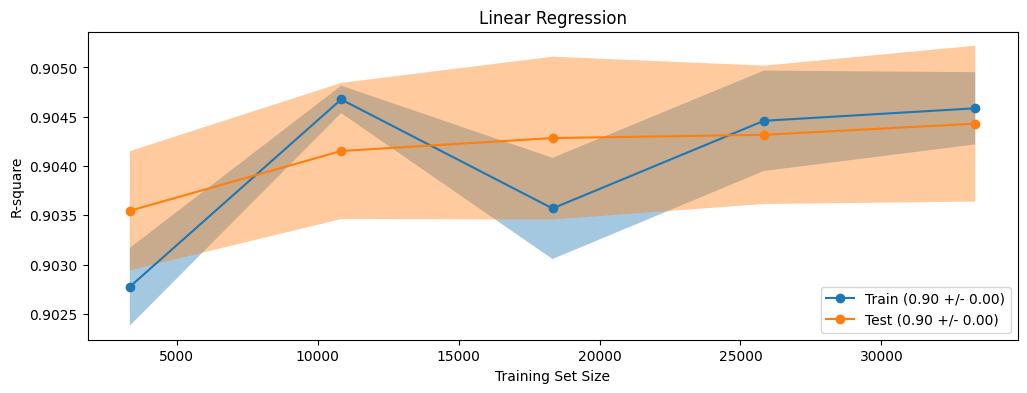

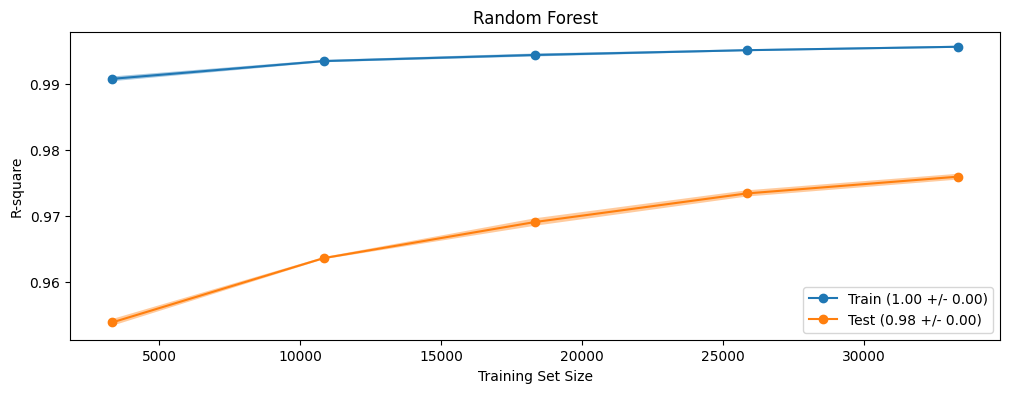

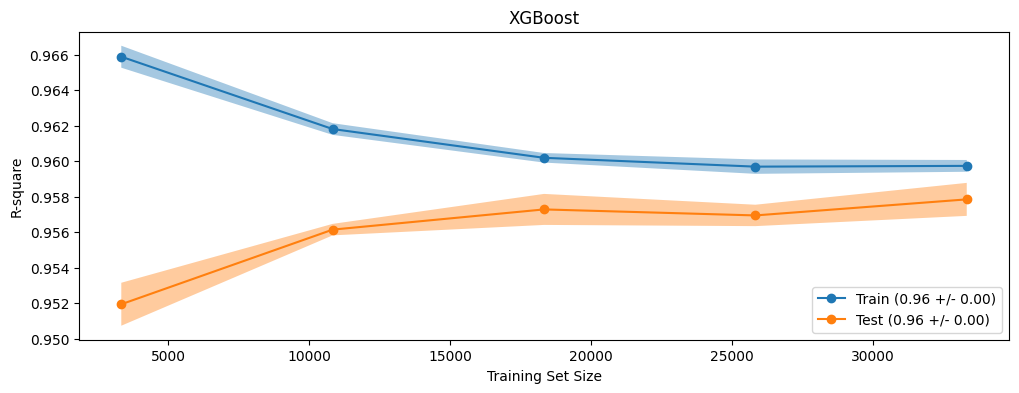

In [71]:
for name, algorithm in algorithms.items():
    plot_learning_curves(name, algorithm)

## 6. Model Training

In [72]:
model = Pipeline(steps=[
    ("pre", preprocessor),
    ("xgb", XGBRegressor(n_estimators=10))
])
model.fit(X_data, y_data)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'category']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=10, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

## 7. Model Evaluation

In [73]:
def evaluate_model(X, y):
	y_pred = model.predict(X)
	return r2_score(y, y_pred)

In [74]:
print(f"R2 score on Training data is = {evaluate_model(X_data, y_data)}")
print(f"R2 score on Test data is = {evaluate_model(X_test, y_test)}")

R2 score on Training data is = 0.9597407579421997
R2 score on Test data is = 0.9592636227607727


## 8. Model Persistence

In [78]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [79]:
saved_model = pickle.load(open('model.pkl','rb'))
saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'category']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=10, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [80]:
saved_model.score(X_test, y_test)

0.9592636227607727